## Macy's management

### Variable Description:
- Email - customer email
- Address - customer address
- Avatar - color options
- Avg Session Length - average lenght of instore session with stylist
- Time on App - Average time spent on App (in minutes)
- Time n Web - Average time spent on Web (in minutes)
- Length of Membership - number of years the customer has been a mmember
- Yearly Amount Spent - annual amount spent by customer (dependent variable)

In [27]:
# load the macys dataset
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

macys = pd.read_csv("macys")
macys.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


## Exploratory Data Analysis

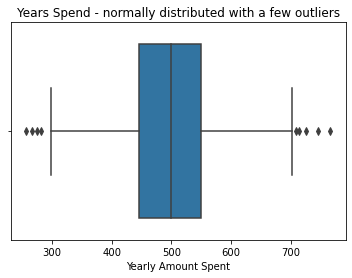

In [6]:
# Distribution of Years Spend
sns.boxplot(x = "Yearly Amount Spent", data = macys)
plt.title("Years Spend - normally distributed with a few outliers");

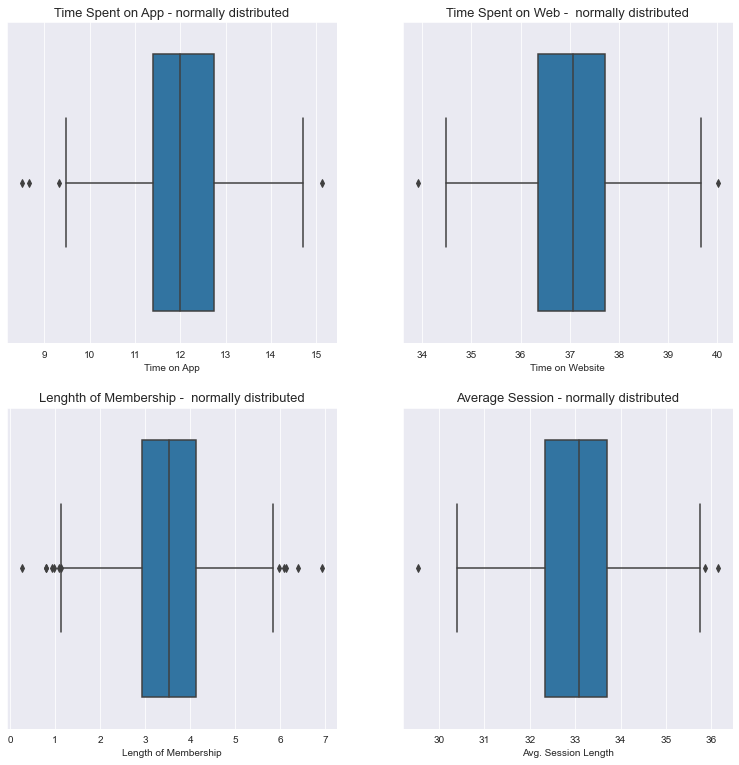

In [10]:
# Distribution of Time spent on App, Web and Length of Membership
sns.set_style("darkgrid")
plt.figure(figsize=(13,13))

plt.subplot(221)
sns.boxplot("Time on App", data=macys)
plt.title("Time Spent on App - normally distributed", fontsize=13)

plt.subplot(222)
sns.boxplot("Time on Website", data=macys)
plt.title("Time Spent on Web -  normally distributed", fontsize=13);

plt.subplot(223)
sns.boxplot("Length of Membership", data=macys)
plt.title("Lenghth of Membership -  normally distributed", fontsize=13);

plt.subplot(224)
sns.boxplot("Avg. Session Length", data=macys)
plt.title("Average Session - normally distributed", fontsize=13);

* All variables in the dataset appear normally distributed with a few outliers.

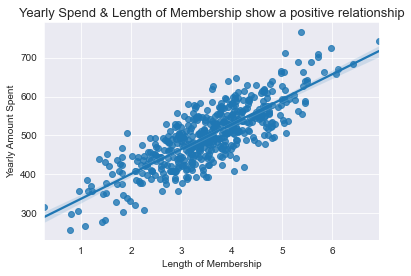

In [11]:
# Length of Membership vs Yearly Spend
sns.regplot(x="Length of Membership", y="Yearly Amount Spent", data=macys);
plt.title("Yearly Spend & Length of Membership show a positive relationship", fontsize=13);

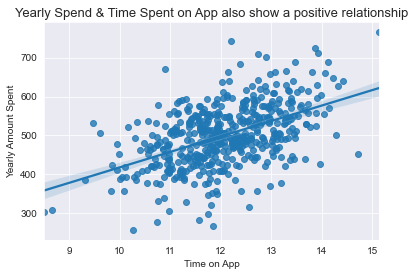

In [12]:
# Time on App vs Yearly Spend
sns.regplot(x="Time on App", y="Yearly Amount Spent", data=macys)
plt.title("Yearly Spend & Time Spent on App also show a positive relationship", fontsize=13);

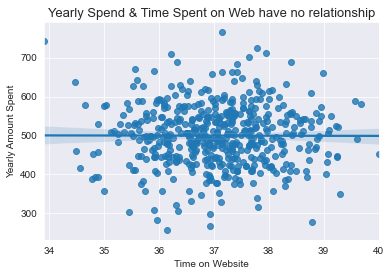

In [13]:
# Time on Web vs Yearly Spend
sns.regplot(x="Time on Website", y="Yearly Amount Spent", data=macys)
plt.title("Yearly Spend & Time Spent on Web have no relationship", fontsize=13);

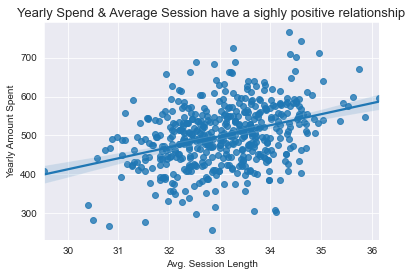

In [14]:
# Average Session vs Yearly Spend
sns.regplot(x="Avg. Session Length", y="Yearly Amount Spent", data=macys)
plt.title("Yearly Spend & Average Session have a sighly positive relationship", fontsize=13);

* Regression line between the time_on_website & yearly_amount_spent seems not to have a relationship

## 1) Preprocessing

### * drop the columns not being used
### * rename columns 

In [28]:
macys_df = macys.drop(["Email", "Address", "Avatar"], axis = 1)
macys_df.columns = ["session", "app", "web", "membership", "spent"]
macys_df

,session,app,web,membership,spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### * detect null values

In [29]:
# Using isnull() function with sum() to check the number of null values 
macys_df.isnull().sum()

session       0
app           0
web           0
membership    0
spent         0
dtype: int64

### * fit a MLR model with the macys dataset splited into train and test sets

In [30]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [31]:
x = macys_df.iloc[:, 0:4]
y = macys_df["spent"]

# split the dataset into train and test sets (ratio: 8:2)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 123)

# reset the indices of the data frames
y_train = y_train.reset_index(drop=True)
x_train = x_train.reset_index(drop=True) 
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [32]:
# fit the model and get the summary
x_train_const = sm.add_constant(x_train) # add a constant column to x_train data frame

train_ml_result = sm.OLS(y_train, x_train_const).fit()
train_ml_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spent   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6103.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        02:46:17   Log-Likelihood:                -1483.7
No. Observations:                 400   AIC:                             2977.
Df Residuals:                     395   BIC:                             2997.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1048.2762     25.025    -41.889      0.000   -1097.475    -999.077
session       25.5367      0.491     52.032      0.000      24.572      26.502
app           38.8657      0.500     77.769      0.000      37.883      39.848
web            0.4794      0.486      0.986      0.325      -0.477       1.436
membership    61.5239      0.514    119.610      0.000      60.513      62.535
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.834   Jarque-Bera (JB):                0.196
Skew:                           0.020   Prob(JB):                        0.907
Kurtosis:                       3.101   Cond. No.                     2.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### * F-test p-value of the multivariate regression model presents the statistical significance of the overall model and an approximate 98% of the variation in "Yearly-Amount Spent" in population is explained by the predictors according to the adjusted R-squred.
###  * Each of the independent variables excepting "web" seems to have their unique ability to predict the dependent variable based on their t-test p-value smaller than 0.05. 

### * Detect and remove outliers

In [33]:
from scipy import stats
import numpy as np

In [34]:
# Concatenate the x and y train data frames 
train_df = pd.concat([y_train, x_train], axis = 1)
train_df.head()

,spent,session,app,web,membership
0,467.501900,30.836433,13.100110,35.907721,3.361613
1,475.015407,32.998388,10.946842,37.647808,3.826031
2,512.552534,34.173752,12.144749,37.258031,3.397363
3,543.340166,32.461212,13.291143,38.633626,3.871003
4,522.404141,34.390164,12.645195,38.468321,2.874597


In [35]:
# remove values whose z-score > |3| across all the columns 
train_df = train_df[(np.abs(stats.zscore(train_df)) < 3).all(axis=1)]
train_df = train_df.reset_index(drop = True)

### Check the corrrelation among independent variables by plotting heatmap

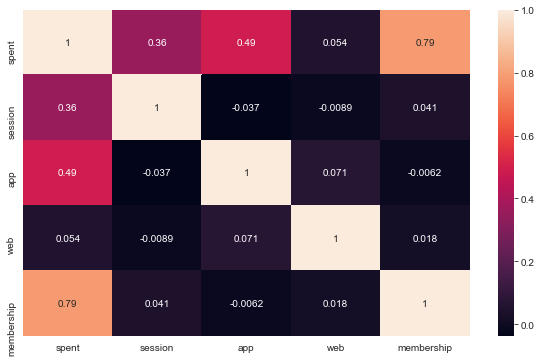

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.heatmap(train_df.corr(), annot=True)

### * No multicollinearity violation is observed
### * Through pairplot, go through the bivariate relationships of each independent variable with "Spent"

<Figure size 720x432 with 0 Axes>

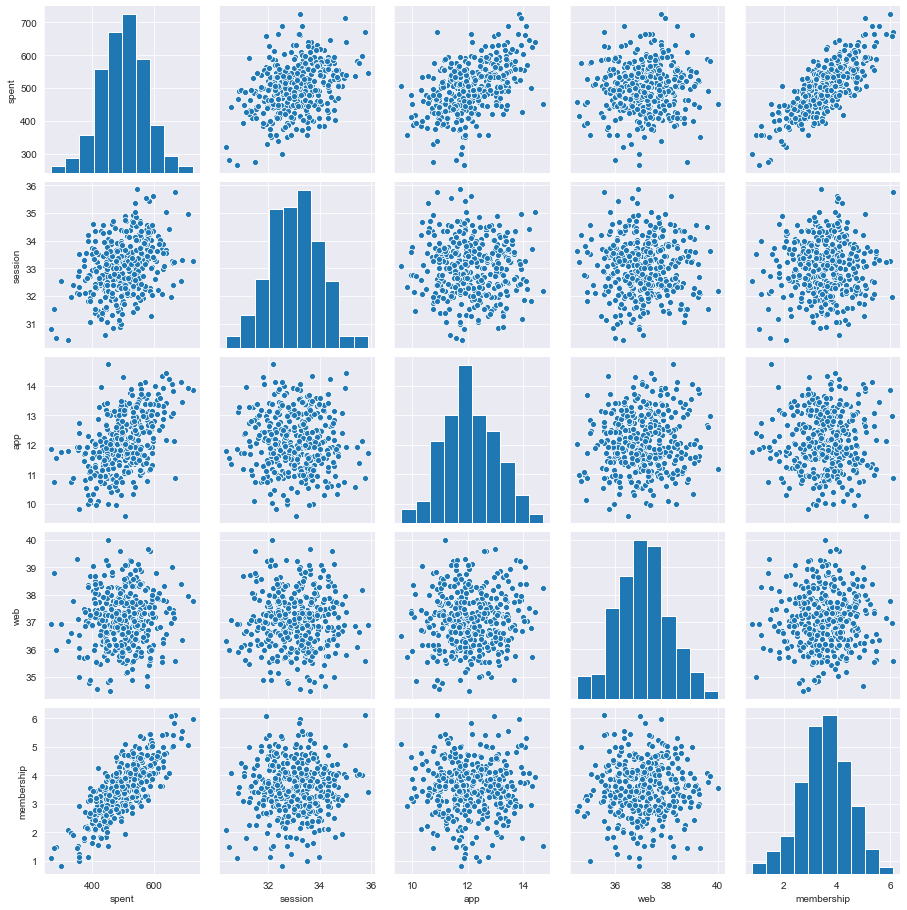

In [37]:
fig = plt.figure(figsize = (10,6))
sns.pairplot(train_df)

### * "Web" does not seem to have a relationship with the "Spent" at the bivariate level as well
### * As the heatmap shows, predictors do not seem related with one another at the bivariate level
### * Drop the "Web" variable from the MLR model

In [38]:
# Drop the column "web"
train_df = train_df.drop(["web"], axis=1)
train_df.head()

,spent,session,app,membership
0,467.501900,30.836433,13.100110,3.361613
1,475.015407,32.998388,10.946842,3.826031
2,512.552534,34.173752,12.144749,3.397363
3,543.340166,32.461212,13.291143,3.871003
4,522.404141,34.390164,12.645195,2.874597


In [39]:
# re-fit the multiple regression line and get summary
x_train = train_df.iloc[:, 1:]
y_train = train_df["spent"]

x_train_const = sm.add_constant(x_train)
train_ml_result2 = sm.OLS(y_train, x_train_const).fit()
train_ml_result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spent   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     7035.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        02:46:39   Log-Likelihood:                -1455.5
No. Observations:                 392   AIC:                             2919.
Df Residuals:                     388   BIC:                             2935.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1037.2833     18.246    -56.849      0.000   -1073.157   -1001.410
session       25.6450      0.510     50.331      0.000      24.643      26.647
app           39.0818      0.524     74.549      0.000      38.051      40.113
membership    61.6825      0.543    113.578      0.000      60.615      62.750
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.119
Skew:                          -0.007   Prob(JB):                        0.942
Kurtosis:                       3.084   Cond. No.                     1.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### * the second model  is overall and individually statistically significant on the basis of its F-test p-value and t-test p-values of each and every independent variable
### * Approximately 98% of the variation in the dependent variable is predicted by the regression line

## 2) Diagnose the model

Text(0.5, 0, 'Residual')

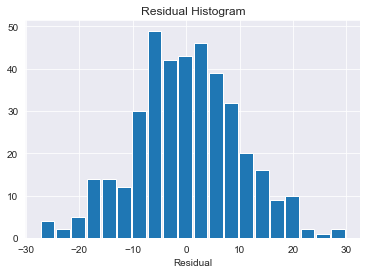

In [40]:
# Residual histogram
train_resid = train_ml_result2.resid # get the residuals of the MLR model
plt.hist(train_resid, bins=20, rwidth=0.9)
plt.title("Residual Histogram")
plt.xlabel("Residual")

### * the variance is normally distributed and no explict outliers are observed
### * Scatter plot for Normalized residuals Vs Fitted values

Text(0, 0.5, 'Studentized Residual')

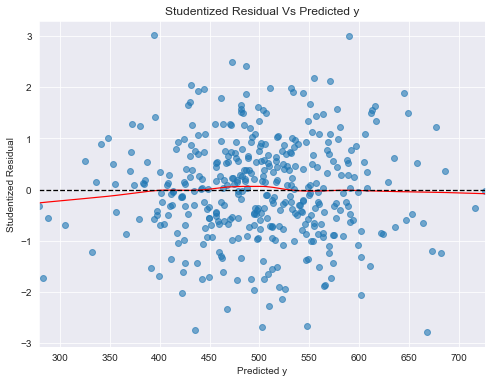

In [41]:
# Scatter plot with studentized residuals and predicted y values
norm_resid = train_ml_result2.get_influence().resid_studentized_internal # normalized the residuals
y_predict = train_ml_result2.fittedvalues # get predicted y values

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.scatter(y_predict, norm_resid, alpha = 0.6)
sns.regplot(y_predict, norm_resid, scatter = False, ci = False, lowess = True,  # add a line showing the shape of the scatter plot
          line_kws={"color":"red", "lw":1.2})
ax.axhline(y=0, c="black", lw=1.3, ls = "--")
ax.set_title("Studentized Residual Vs Predicted y")
ax.set_xlabel("Predicted y")
ax.set_ylabel("Studentized Residual")

### * The data points are well clustered around the line y=0 and randomly lying
### * That is, the data is linear and homoscedastic
### * Q-Q plot through ProbPlot

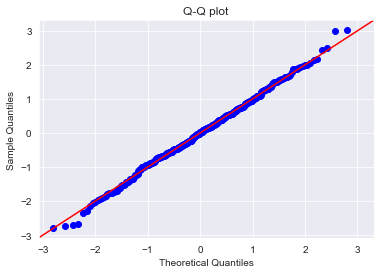

In [42]:
sm.qqplot(norm_resid, line = "45")
plt.title("Q-Q plot")
plt.show()

### * qqplot shows that the dataset meets the normality
### * finally, check if there are serious outliers through leverage and normalized residuals

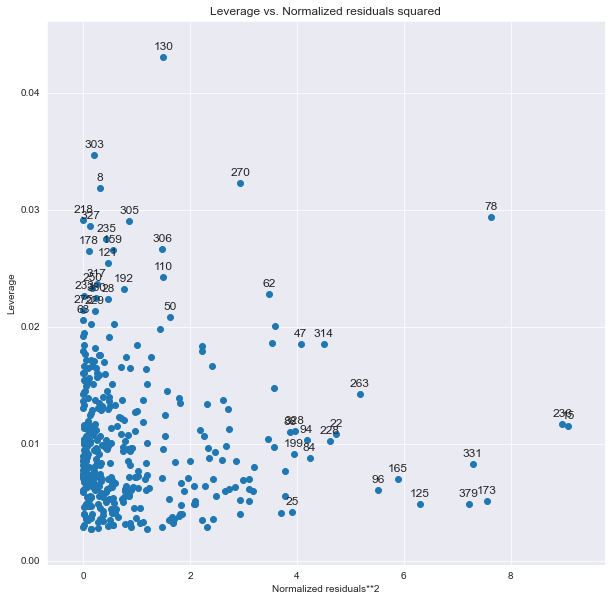

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.graphics.plot_leverage_resid2(train_ml_result2, ax = ax)
plt.show()

Text(0.5, 0, 'Normalized Residuals')

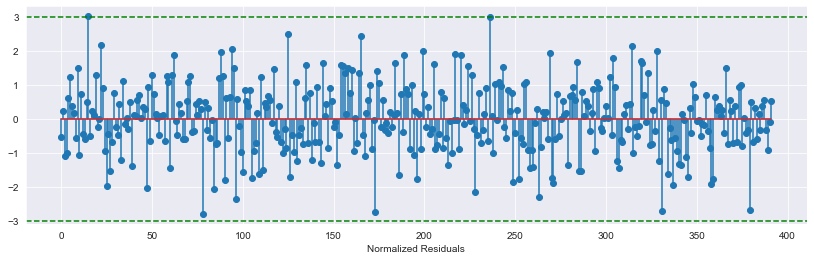

In [44]:
# whether the normalized residuals are lying within a threshold
plt.figure(figsize = (14, 4))
plt.stem(norm_resid)
plt.axhline(3, c="g", ls="--") # outliers if the normalized residuals are bigger than |2| ~ |4|
plt.axhline(-3, c="g", ls="--") 
plt.xlabel("Normalized Residuals")

## 3) Determine which variables should be focused more

### * To compare the predictor variables' contributability, standardize all the independent variables to unify their scales


In [45]:
from sklearn.preprocessing import StandardScaler  # load it to standardize independent variables 
scaler = StandardScaler()
scaled_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = ["session", "app", "membership"])

In [46]:
# fit the final model
final_train_model = sm.OLS(y_train, sm.add_constant(scaled_x_train)).fit()
final_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  spent   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     7035.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        02:47:04   Log-Likelihood:                -1455.5
No. Observations:                 392   AIC:                             2919.
Df Residuals:                     388   BIC:                             2935.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        500.4044      0.503    994.191      0.000     499.415     501.394
session       25.3715      0.504     50.331      0.000      24.380      26.363
app           37.5492      0.504     74.549      0.000      36.559      38.539
membership    57.2148      0.504    113.578      0.000      56.224      58.205
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.119
Skew:                          -0.007   Prob(JB):                        0.942
Kurtosis:                       3.084   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## -> According to the scaled coefficients of each predictor, the length of membership has the strongest influence on the yearly amount spent in population considering only app as the method of purchase.

## 4) r-squared of the train model against the test set

In [47]:
# drop "web" from x_test 
x_test = x_test.drop(["web"], axis=1)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
final_model_sk = LinearRegression().fit(x_train, y_train)
pred_y_test = final_model_sk.predict(x_test) # calculate the predicted y values by plugging x_test values to the model
np.abs(r2_score(y_test, pred_y_test)) # get the r_squred score

0.9850992155555234

### * the model's r-squred with the test y values is over 98% 

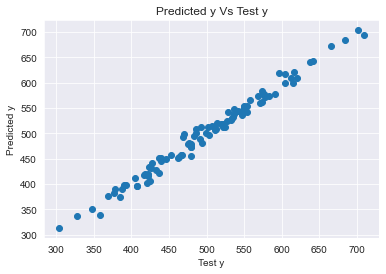

In [49]:
# scatter plot is formed as a straight line
plt.scatter(y_test, pred_y_test)
plt.title("Predicted y Vs Test y")
plt.xlabel("Test y")
plt.ylabel("Predicted y")
plt.show()